<a href="https://colab.research.google.com/github/Madhumithats08/SlateMate/blob/main/SlateMate_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install detoxify transformers torch pandas matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 847.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!pip install textblob

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from detoxify import Detoxify
from textblob import TextBlob

In [18]:
df.head()

,post_id,platform,post_text,hashtags,timestamp,image_url,likes,comments,author
0,47e186c6-e733-408e-af1e-bb65449a3f78,Twitter,10 tips to stay focused during exams.,#fun #life,2025-05-14 10:02:14,47e186c6-e733-408e-af1e-bb65449a3f78.jpg,992,48,melissaroman
1,7c28cde1-cc57-4bd8-8c23-e1cb3bedccb8,Twitter,This is the most violent movie scene ever!,#news #world,2025-05-14 10:02:37,7c28cde1-cc57-4bd8-8c23-e1cb3bedccb8.jpg,3182,404,tcompton
2,3ad5fe36-e5cb-4103-8fca-7e790401916c,Twitter,Watch this hilarious prank compilation!,#meme #lol,2025-05-14 10:01:14,3ad5fe36-e5cb-4103-8fca-7e790401916c.jpg,1705,651,nichole75
3,8cf85611-6c6c-4402-8a6c-d4045ea36e6d,Facebook,Study hacks for competitive exams.,#chess #learn,2025-05-14 10:01:39,8cf85611-6c6c-4402-8a6c-d4045ea36e6d.jpg,929,255,frankdavis
4,cde51b30-dc85-4dd4-8e40-e27070a1ea62,Twitter,"Hate this so much, can't believe it!",#fun #life,2025-05-14 10:03:03,cde51b30-dc85-4dd4-8e40-e27070a1ea62.jpg,1488,792,laura07


In [17]:
#Load Dataset
df = pd.read_csv("social_feed_metadata.csv")
df['post_text'] = df['post_text'].fillna("")
df['hashtags'] = df['hashtags'].fillna("")

In [19]:
#Compute Toxicity Score
print("🔍 Calculating toxicity scores...")
tox_model = Detoxify('original')
df['toxicity_score'] = df['post_text'].apply(lambda text: tox_model.predict(text)['toxicity'])


🔍 Calculating toxicity scores...


In [20]:
#Keyword-based Flagging
unsafe_keywords = ['kill', 'hate', 'nsfw', 'violence', 'gun', 'die', 'blood', 'attack', 'hurt', 'explosion', 'abuse']

def keyword_flag(text):
    text = text.lower()
    for word in unsafe_keywords:
        if word in text:
            return True
    return False

df['keyword_flagged'] = df['post_text'].apply(keyword_flag)

In [21]:
#Emotional Tone Detection
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity < -0.3:
        return "Angry/Sad"
    elif polarity > 0.3:
        return "Positive"
    else:
        return "Neutral"

df['emotional_tone'] = df['post_text'].apply(get_sentiment)

In [22]:
#Classification Logic
def classify(row):
    score = row['toxicity_score']
    if score > 0.7 or row['keyword_flagged']:
        return "Unsafe"
    elif score >= 0.3 or row['emotional_tone'] == "Angry/Sad":
        return "Neutral"
    else:
        return "Safe"

df['final_label'] = df.apply(classify, axis=1)

In [31]:
#Simulate image analysis (mock-up)
import random

# Fake image flag simulation for demo purposes
def simulate_image_flag(filename):
    if pd.isna(filename) or filename.strip() == "":
        return "No image"
    flagged_labels = ["Clean", "Adult", "Violence", "Racy"]
    return random.choices(flagged_labels, weights=[0.7, 0.1, 0.1, 0.1])[0]

df['image_flag'] = df['image_url'].apply(simulate_image_flag)


In [26]:
def get_reason(row):
    reasons = []

    # Text-based toxicity
    if row['toxicity_score'] > 0.7:
        reasons.append("High toxicity detected")
    elif row['toxicity_score'] >= 0.3:
        reasons.append("Mildly toxic or emotionally charged")
    else:
        reasons.append("Clean content")

    # Keyword-based
    if row['keyword_flagged']:
        reasons.append("Unsafe keyword found")

    # Emotion-based
    if row['emotional_tone'] == "Angry/Sad":
        reasons.append("Detected negative emotion")

    # Image-based (simulated)
    if row['image_flag'] != "Clean" and row['image_flag'] != "No image":
        reasons.append(f"Image flagged for: {row['image_flag']}")

    return "; ".join(reasons)
df['reason'] = df.apply(get_reason, axis=1)


In [30]:
#Export Results
output_df = df[['post_id', 'post_text', 'toxicity_score', 'final_label', 'reason']]
output_df.to_csv("moderated_feed.csv", index=False)
print("✅ Saved results to 'moderated_feed.csv'")


✅ Saved results to 'moderated_feed.csv'


<ipython-input-29-b6ea766b3924>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='final_label', palette='Set2')


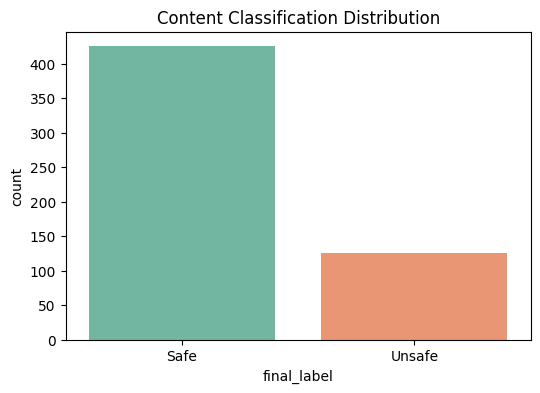

In [29]:
#Visualization
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='final_label', palette='Set2')
plt.title("Content Classification Distribution")
plt.savefig("label_distribution.png")
plt.show()